##  Descrição do Conjunto de Dados

Este projeto utiliza como base o conjunto de dados publicado no artigo:

> **Tognoli, F. M. W., Bruski, S. D., & Araujo, T. P. (2021)**  
> *A análise dos dados revela que eventos extremos aumentaram as inundações no Vale do Rio Taquari, sul do Brasil*.  
> Revista *Latin American Data in Science*, v. 1, n. 1, p. 16–25.  
> [Link para o artigo](https://ojs.datainscience.com.br/lads/article/view/20) — DOI: [10.53805/lads.v1i1.20](https://doi.org/10.53805/lads.v1i1.20)

O banco de dados foi obtido a partir dos registros da estação pluviométrica de **Encantado**, município localizado às margens do Rio Taquari, no estado do Rio Grande do Sul, Brasil. Ele compreende:

- **78 anos de dados pluviométricos** contínuos (de abril de 1943 a dezembro de 2020)  
- **36.466 registros diários** de precipitação  
- **Volume anual de precipitação** por ano  
- **Dados de 44 inundações**, incluindo o nível máximo do rio em 32 delas  
- Complementado com dados públicos da Agência Nacional de Águas (ANA) e do repositório HidroWeb

####  Objetivo no projeto

Este conjunto de dados serve como base para uma análise estatística detalhada do comportamento da precipitação e sua relação com a ocorrência de inundações na região. A partir dele, serão desenvolvidas hipóteses, visualizações e possíveis modelos preditivos voltados à mitigação de riscos climáticos e ao fortalecimento da **resiliência urbana e ambiental**.


## 1. **Pré-processamento Inicial**

In [1]:
import pandas as pd

# Carregar os datasets com delimitador
df1 = pd.read_csv("C:/Users/joaop/Downloads/analise alertaviva/encantado-annual-rainfall.csv", sep=';')
df2 = pd.read_csv("C:/Users/joaop/Downloads/analise alertaviva/encantado-rain-data.csv", sep=';')
df3 = pd.read_csv("C:/Users/joaop/Downloads/analise alertaviva/encantado-rain-flood.csv", sep=';')

# Padronizar os nomes das colunas de data
df2.rename(columns={'Date': 'Date'}, inplace=True)
df3.rename(columns={'Date ': 'Date'}, inplace=True)

# Corrigir datas inválidas no df3 (substituindo '00' por '01' no dia)
df3['Date'] = df3['Date'].str.replace('00/', '01/')

# Converter para datetime
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)
df3['Date'] = pd.to_datetime(df3['Date'], dayfirst=True)

# Extrair o ano
df2['Year'] = df2['Date'].dt.year
df3['Year'] = df3['Date'].dt.year

# Merge usando o ano como chave
merged_df = pd.merge(df1, df2, on='Year', how='outer')
final_df = pd.merge(merged_df, df3, on='Year', how='outer')

# Salvando o resultado
final_df.to_csv("C:/Users/joaop/Downloads/analise alertaviva/dados-merged-data.csv", index=False)

print("Merge concluído com sucesso!")
print(f"Total de registros: {len(final_df)}")
print(f"Colunas: {final_df.columns.tolist()}")

Merge concluído com sucesso!
Total de registros: 1080
Colunas: ['Volume(mm)', 'Year', 'Station_Code', 'Data_Type', 'Date_x', 'Month', 'Measurer', 'Daily_max_vol', 'Day_max_vol', 'Rain_days', 'Monthly_total_vol', 'Annual_vol', 'Vol_fortnight1_x', 'Vol_fortnight2_x', 'Vol_week1_x', 'Vol_week2_x', 'Vol_week3_x', 'Vol_week4_x', 'Day01', 'Day02', 'Day03', 'Day04', 'Day05', 'Day06', 'Day07', 'Day08', 'Day09', 'Day10', 'Day11', 'Day12', 'Day13', 'Day14', 'Day15', 'Day16', 'Day17', 'Day18', 'Day19', 'Day20', 'Day21', 'Day22', 'Day23', 'Day24', 'Day25', 'Day26', 'Day27', 'Day28', 'Day29', 'Day30', 'Day31', 'Date_y', 'River position (m)', 'Monthly_total_vol ', 'Vol_fortnight1_y', 'Vol_fortnight2_y', 'Vf_mean', 'Vol_week1_y', 'Vol_week2_y', 'Vol_week3_y', 'Vol_week4_y', 'Vw_mean', 'Select']


1. **Importação dos dados:**  
   Foram carregados três arquivos CSV contendo diferentes informações de chuva e enchentes, utilizando o delimitador correto (`;`) para leitura adequada dos arquivos.

2. **Padronização dos nomes das colunas de data:**  
   Ajustou-se o nome da coluna de data nos datasets para garantir uniformidade, removendo espaços extras quando necessário.

3. **Correção de datas inválidas:**  
   No terceiro dataset, foi feita a substituição dos dias '00' por '01' na coluna de datas para corrigir valores inválidos e permitir a conversão correta para o formato datetime.

4. **Conversão para formato datetime:**  
   As colunas de data foram convertidas para o tipo datetime do pandas, configurando o parâmetro `dayfirst=True` para considerar o formato dia/mês/ano.

5. **Extração do ano:**  
   Criou-se uma nova coluna com o ano extraído da coluna de datas para facilitar o processo de junção dos datasets.

6. **União dos datasets:**  
   Os três datasets foram unidos (merge) com base na coluna "Year" (ano), utilizando a estratégia de união externa (outer join) para preservar todos os registros.

7. **Exportação do resultado:**  
   O dataset final consolidado foi salvo em CSV para uso posterior, e algumas informações sobre o resultado da união foram exibidas no console.

In [2]:
# Selecionar e renomear colunas importantes
cols_to_keep = {
    'Year': 'Year',
    'Volume(mm)': 'Annual_rainfall',
    'Monthly_total_vol': 'Monthly_rainfall',
    'River position (m)': 'River_level',
    'Rain_days': 'Rainy_days',
    'Daily_max_vol': 'Max_daily_rainfall'
}

# Criar um novo dataframe limpo
clean_df = final_df[list(cols_to_keep.keys())].rename(columns=cols_to_keep)

# Adicionar colunas de data (usando a mais completa disponível)
clean_df['Date'] = final_df['Date_y'].fillna(final_df['Date_x'])

# Adicionar outras colunas úteis (selecionando as mais completas entre _x e _y)
clean_df['Vol_fortnight'] = final_df['Vol_fortnight1_y'].fillna(final_df['Vol_fortnight1_x'])
clean_df['Vol_week'] = final_df['Vol_week1_y'].fillna(final_df['Vol_week1_x'])

# Reordenar colunas
clean_df = clean_df[[
    'Date', 'Year',
    'Annual_rainfall', 'Monthly_rainfall', 'Max_daily_rainfall',
    'River_level', 'Rainy_days',
    'Vol_fortnight', 'Vol_week'
]]

# Remover linhas totalmente vazias
clean_df = clean_df.dropna(how='all')

# Salvar o resultado limpo
clean_df.to_csv("C:/Users/joaop/Downloads/analise alertaviva/dados-cleaned-data.csv", index=False)

print("DataFrame criado com sucesso!")
print(f"Colunas finais: {clean_df.columns.tolist()}")
print(f"Registros: {len(clean_df)}")

DataFrame criado com sucesso!
Colunas finais: ['Date', 'Year', 'Annual_rainfall', 'Monthly_rainfall', 'Max_daily_rainfall', 'River_level', 'Rainy_days', 'Vol_fortnight', 'Vol_week']
Registros: 1077


1. **Seleção e renomeação de colunas relevantes:**  
   Foi criado um dicionário `cols_to_keep` para selecionar as colunas mais importantes do dataset unificado (`final_df`) e padronizar seus nomes para uma nomenclatura mais clara e amigável para o mapeamento futuro.

2. **Criação de um novo DataFrame limpo:**  
   Com base nas colunas selecionadas, foi gerado o `clean_df`, contendo apenas as variáveis-chave para análise, já com os nomes renomeados.

3. **Construção da coluna de data:**  
   Para maximizar a completude da coluna de data, utilizou-se a coluna `Date_y` e, quando esta estivesse nula, foi preenchida com `Date_x`.

4. **Seleção das colunas mais completas de volumes semanais e quinzenais:**  
   Foram criadas duas novas colunas (`Vol_fortnight` e `Vol_week`) a partir das versões `_y` e `_x`, mantendo sempre os valores não nulos disponíveis.

5. **Reordenação das colunas:**  
   As colunas foram reorganizadas para melhorar a legibilidade e facilitar a análise posterior, com a data e ano no início, seguidos pelas variáveis meteorológicas e hidrológicas.

6. **Remoção de linhas completamente vazias:**  
   Para garantir um conjunto de dados mais limpo, quaisquer linhas que estivessem completamente vazias foram removidas.

7. **Exportação do dataset limpo:**  
   O DataFrame final `clean_df` foi exportado para um arquivo CSV, pronto para ser utilizado em análises, visualizações ou modelagens.

In [3]:
import pandas as pd

df = pd.read_csv("C:/Users/joaop/Downloads/analise alertaviva/dados-cleaned-data.csv")

# Mostrar primeiras linhas (mais antigas)
print("Primeiras linhas (dados antigos):")
print(df.head())

# Mostrar últimas linhas (mais recentes)
print("\nÚltimas linhas (dados recentes):")
print(df.tail())

# Mostrar intervalo total de datas
print("\nData mínima:", df['Date'].min())
print("Data máxima:", df['Date'].max())

# Filtrar e mostrar registros dos anos mais recentes, ex: últimos 5 anos
anos_recentes = df[df['Year'] >= df['Year'].max() - 5]
print("\nExemplos dos últimos 5 anos:")
print(anos_recentes.head())


Primeiras linhas (dados antigos):
         Date    Year  Annual_rainfall  Monthly_rainfall  Max_daily_rainfall  \
0  1943-12-01  1943.0            859.3             110.3                30.4   
1  1943-11-01  1943.0            859.3              23.7                 9.3   
2  1943-10-01  1943.0            859.3              39.9                22.3   
3  1943-09-01  1943.0            859.3             111.1                46.5   
4  1943-08-01  1943.0            859.3              80.2                30.0   

   River_level  Rainy_days  Vol_fortnight  Vol_week  
0          NaN         7.0           73.6      13.0  
1          NaN         5.0            6.7       0.0  
2          NaN         3.0           39.9       0.0  
3          NaN        10.0           58.2       5.7  
4          NaN         8.0           59.7      28.7  

Últimas linhas (dados recentes):
            Date    Year  Annual_rainfall  Monthly_rainfall  \
1072  2020-04-01  2020.0            769.8               0.0   
1

1. **Cobertura Temporal:**  
   O conjunto de dados apresenta registros que cobrem um longo intervalo temporal, desde **1943 até 2021**.

2. **Dados Históricos:**  
   As primeiras linhas mostram dados históricos de **1943**, com valores consistentes de volume anual e mensal de chuva, máxima diária e dias chuvosos.

3. **Dados Recentes:**  
   Os dados recentes, com registros até **2021**, demonstram a continuidade da coleta, ainda que com algumas lacunas em variáveis específicas (como valores ausentes em `Annual_rainfall` e `Monthly_rainfall` em alguns meses recentes).

4. **Dados Ausentes:**  
   Algumas variáveis apresentam dados ausentes, especialmente `River_level`, o que deve ser considerado nas etapas de limpeza e tratamento.

6. **Abrangência e Relevância:**  
   A variedade e abrangência temporal dos dados permitem análises robustas para entender padrões de chuva e seus impactos ao longo das décadas.

1. **Colunas principais**: Data, ano, precipitação anual e mensal, precipitação máxima diária, nível do rio, dias chuvosos, volumes quinzenais e semanais.

2. **Dados faltantes**: A coluna `River_level` apresenta valores `NaN` em toda a amostra, indicando dados ausentes que precisam ser tratados ou justificados.

3. **Consistência do ano**: A coluna `Year` corresponde corretamente ao ano extraído da data, o que é positivo para alinhamento temporal.

4. **Valores fixos na precipitação anual**: `Annual_rainfall` tem o mesmo valor (859.3) em todas as linhas da amostra.

5. **Variabilidade nas outras variáveis**: `Monthly_rainfall`, `Max_daily_rainfall` e volumes quinzenais/semanas apresentam variações plausíveis entre meses.

6. **Formato de data**: A coluna `Date` está em formato padrão `YYYY-MM-DD`, adequada para análise temporal.

In [4]:
mapeamento_colunas = {
    'Volume(mm)': 'Volume_Chuva_Anual_mm',
    'Year': 'Ano',
    'Station_Code': 'Codigo_Estacao',
    'Data_Type': 'Tipo_Dado',
    'Date_x': 'Data',
    'Month': 'Mes',
    'Measurer': 'Medidor',
    'Daily_max_vol': 'Volume_Maximo_Diario_mm',
    'Day_max_vol': 'Dia_Maximo_Chuva',
    'Rain_days': 'Dias_Chuvosos',
    'Monthly_total_vol': 'Volume_Mensal_mm',
    'Annual_vol': 'Volume_Anual_mm',
    'River position (m)': 'Nivel_Rio_metros',
    'Select': 'Selecao'
}

1. **Criação do Dicionário de Mapeamento:**  
   Foi criado um dicionário chamado `mapeamento_colunas` para associar os nomes originais das colunas do DataFrame `dados` a nomes mais claros, descritivos e padronizados em português.

## 2. **Limpeza e Tratamento de Dados**

In [5]:
import pandas as pd

# Carregar ou definir o DataFrame original (ajuste essa linha conforme seu contexto)
dados = df.copy()  # Substitua 'df' pelo seu DataFrame original, se for outro

# 1. Remover colunas com mais de 50% de valores nulos
percentual_nulos = dados.isna().mean()
colunas_pouco_utilizadas = percentual_nulos[percentual_nulos > 0.5].index
dados = dados.drop(columns=colunas_pouco_utilizadas)

# 2. Converter coluna 'Data' para datetime e remover linhas com data inválida
if 'Data' in dados.columns:
    dados['Data'] = pd.to_datetime(dados['Data'], errors='coerce')
    dados = dados.dropna(subset=['Data'])

# 3. Preencher valores nulos em variáveis numéricas com a mediana
colunas_numericas = ['Volume_Chuva_Anual_mm', 'Volume_Mensal_mm', 'Nivel_Rio_metros']
for coluna in colunas_numericas:
    if coluna in dados.columns:
        dados[coluna] = dados[coluna].fillna(dados[coluna].median())

# 4. Preencher valores nulos em variáveis categóricas com o valor mais comum (moda)
colunas_categoricas = ['Medidor', 'Tipo_Dado', 'Selecao']
for coluna in colunas_categoricas:
    if coluna in dados.columns:
        if not dados[coluna].mode().empty:
            dados[coluna] = dados[coluna].fillna(dados[coluna].mode()[0])

# 5. Para variáveis numéricas sequenciais, tentar interpolar valores faltantes
colunas_para_interpolar = ['Volume_Chuva_Anual_mm', 'Volume_Mensal_mm']
for coluna in colunas_para_interpolar:
    if coluna in dados.columns:
        dados[coluna] = dados[coluna].interpolate(method='linear')

# 6. Opcional: Remover linhas que contenham NaNs remanescentes
dados = dados.dropna()

# 7. Conferir quantos NaNs sobraram
print("Valores nulos restantes por coluna:")
print(dados.isna().sum())


Valores nulos restantes por coluna:
Date                  0
Year                  0
Annual_rainfall       0
Monthly_rainfall      0
Max_daily_rainfall    0
Rainy_days            0
Vol_fortnight         0
Vol_week              0
dtype: int64


1. **Remoção de colunas com muitos valores nulos:**  
   Identificamos e removemos todas as colunas que possuem mais de 50% dos seus valores nulos, pois essas colunas trazem pouca informação útil para análise.

2. **Tratamento da coluna de datas:**  
   Convertendo a coluna `'Data'` para o tipo datetime, com tratamento de erros para transformar datas inválidas em valores nulos (`NaT`). Em seguida, removemos todas as linhas que ainda possuem datas inválidas (nulas).

3. **Preenchimento de valores nulos em colunas numéricas:**  
   Para as variáveis numéricas importantes (`Volume_Chuva_Anual_mm`, `Volume_Mensal_mm`, `Nivel_Rio_metros`), os valores ausentes foram preenchidos com a mediana da respectiva coluna, garantindo uma substituição robusta e evitando distorções por valores extremos.

4. **Preenchimento de valores nulos em colunas categóricas:**  
   Nas colunas categóricas (`Medidor`, `Tipo_Dado`, `Selecao`), os valores ausentes foram substituídos pelo valor mais frequente (moda), mantendo a consistência dos dados.

5. **Interpolação para variáveis numéricas sequenciais:**  
   Para colunas numéricas que possuem uma sequência temporal, como `Volume_Chuva_Anual_mm` e `Volume_Mensal_mm`, aplicamos interpolação linear para estimar valores faltantes, suavizando possíveis lacunas.

6. **Remoção final de linhas com valores nulos:**  
   Após os preenchimentos, qualquer linha que ainda contivesse valores nulos foi removida para garantir a integridade dos dados.

7. **Verificação final de valores nulos:**  
   Por fim, mostramos a quantidade de valores nulos restantes por coluna para confirmar o sucesso do tratamento.


## 3. **Exploração dos Dados**

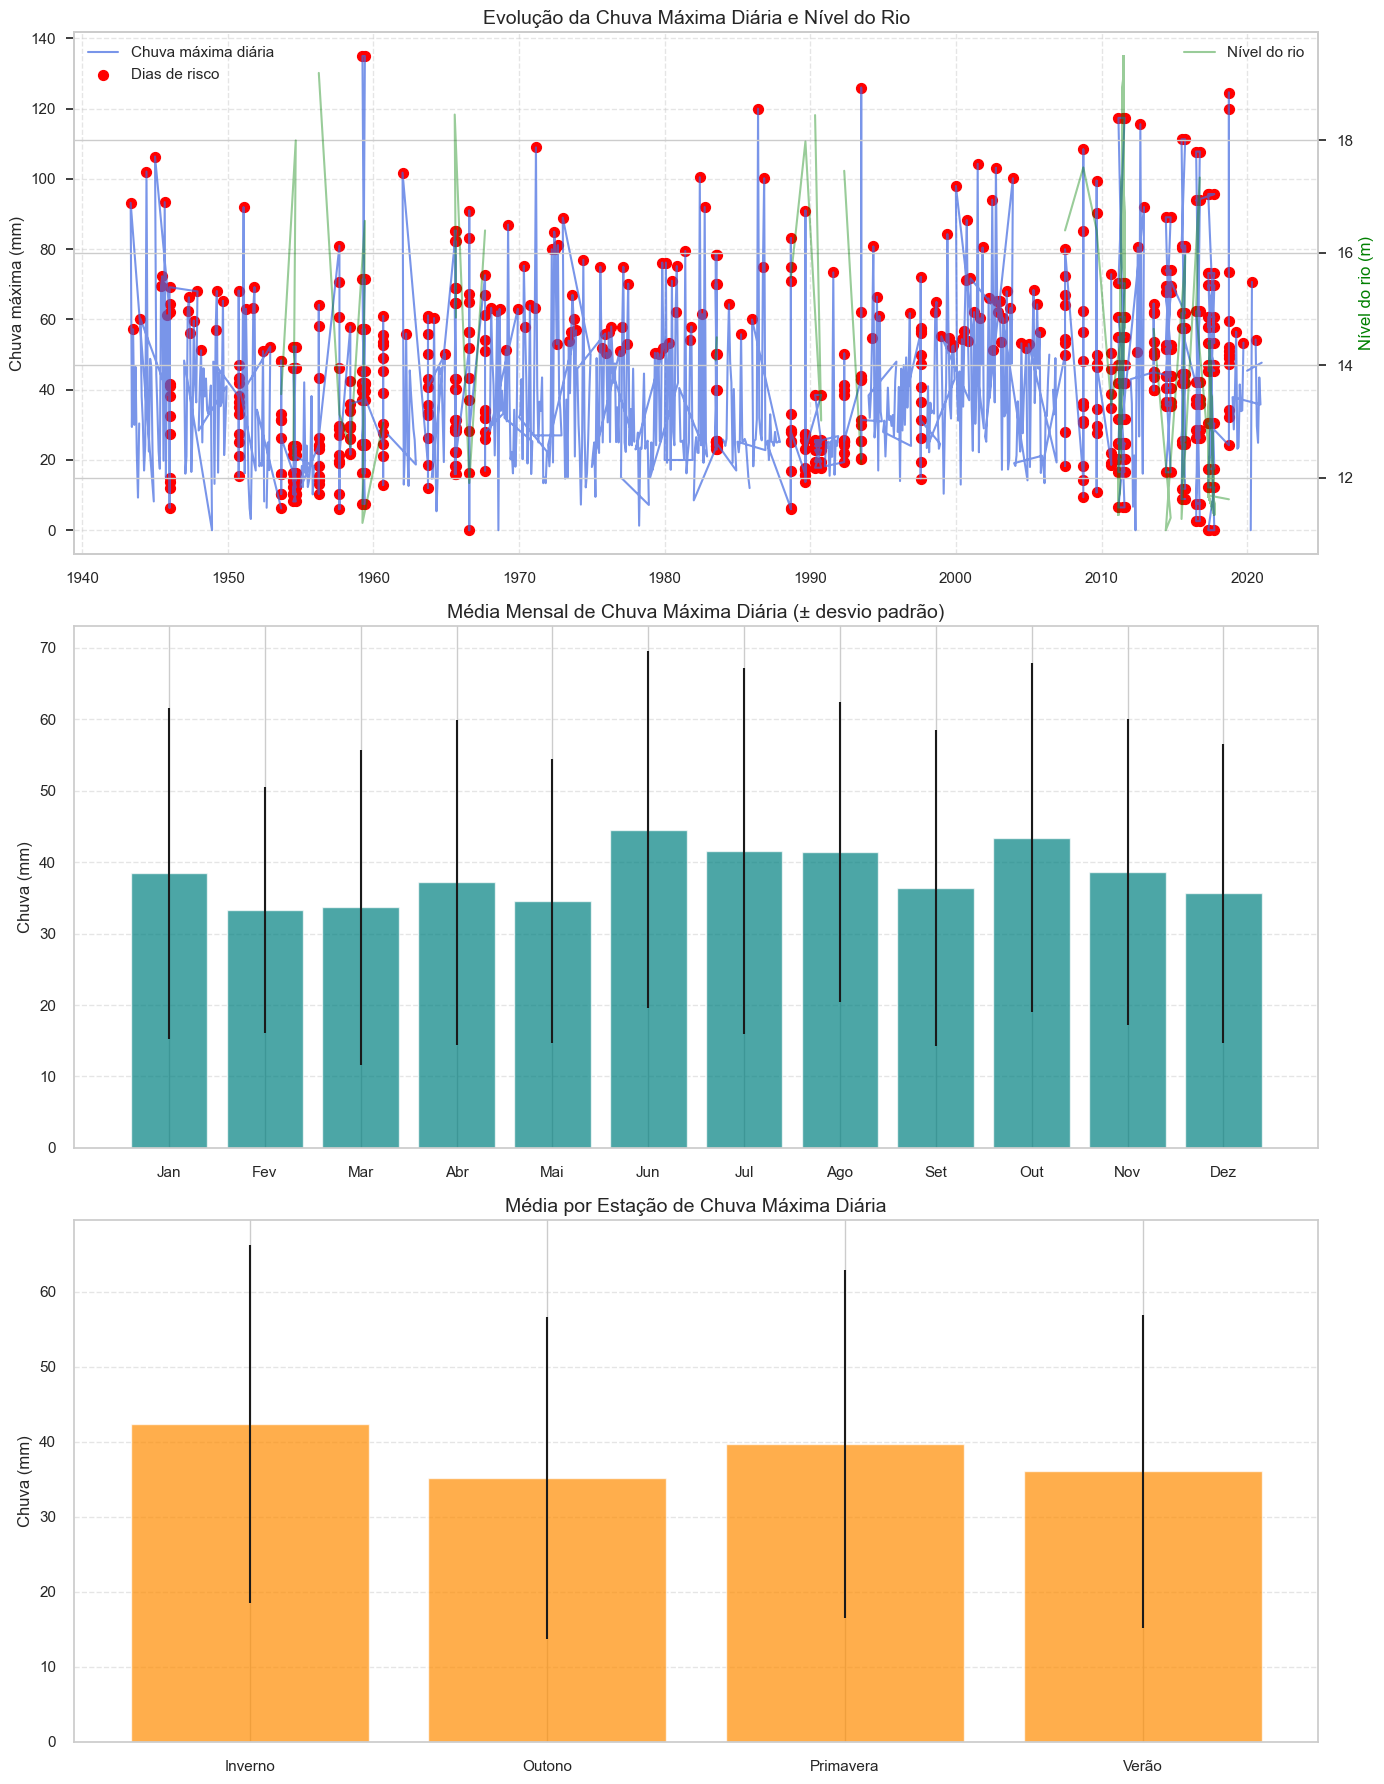


=== Estatísticas por Mês ===
|   Month |   Avg_Rainfall |   Std_Rainfall |   Max_Rainfall |   Avg_Rainy_Days |
|--------:|---------------:|---------------:|---------------:|-----------------:|
|       1 |          38.43 |          23.14 |          106.4 |             7.78 |
|       2 |          33.28 |          17.16 |           92   |             7.91 |
|       3 |          33.71 |          22.05 |          117.4 |             7.52 |
|       4 |          37.15 |          22.8  |          135   |             7.28 |
|       5 |          34.57 |          19.87 |           95.7 |             6.98 |
|       6 |          44.53 |          24.98 |          135   |             8.63 |
|       7 |          41.6  |          25.59 |          126   |             7.68 |
|       8 |          41.4  |          20.95 |          117.4 |             8.28 |
|       9 |          36.34 |          22.08 |          115.6 |             7.44 |
|      10 |          43.44 |          24.38 |          124.6 |      

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuração dos gráficos
try:
    plt.style.use('seaborn-v0_8')
except:
    plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

# 1. Pré-processamento dos dados
try:
    # Verificando a coluna 'Date'
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Extrair mês da data
    df['Month'] = df['Date'].dt.month
    
    # Definindo estações do ano (hemisfério sul)
    def definir_estacao(mes):
        if 3 <= mes <= 5:
            return 'Outono'
        elif 6 <= mes <= 8:
            return 'Inverno'
        elif 9 <= mes <= 11:
            return 'Primavera'
        else:
            return 'Verão'
    
    df['Season'] = df['Month'].apply(definir_estacao)
    
    # 2. Cálculo de estatísticas
    # Estatísticas por mês
    estatisticas_mes = df.groupby('Month').agg({
        'Max_daily_rainfall': ['mean', 'std', 'max'],
        'Rainy_days': 'mean'
    }).reset_index()
    estatisticas_mes.columns = ['Month', 'Avg_Rainfall', 'Std_Rainfall', 'Max_Rainfall', 'Avg_Rainy_Days']
    
    # Estatísticas por estação
    estatisticas_estacao = df.groupby('Season').agg({
        'Max_daily_rainfall': ['mean', 'std', 'max'],
        'Rainy_days': 'mean'
    }).reset_index()
    estatisticas_estacao.columns = ['Season', 'Avg_Rainfall', 'Std_Rainfall', 'Max_Rainfall', 'Avg_Rainy_Days']
    
    # 3. Identificação de dias com risco de enchente
    # Limiares
    limiar_chuva = 50  #
    limiar_nivel_rio = 5.0  
    
    # Verificando colunas para critérios de risco
    criterios = [(df['Max_daily_rainfall'] > limiar_chuva)]
    labels = [f'Chuva > {limiar_chuva}mm']
    
    if 'River_level' in df.columns:
        criterios.append(df['River_level'] > limiar_nivel_rio)
        labels.append(f'Nível do rio > {limiar_nivel_rio}m')
    
    df['Flood_Risk'] = False
    if len(criterios) > 0:
        df['Flood_Risk'] = pd.concat(criterios, axis=1).any(axis=1)
    
    dias_risco = df[df['Flood_Risk']]
    
    # 4. Visualizações gráficas
    fig, axs = plt.subplots(3, 1, figsize=(14, 18))
    
    # Gráfico 1: Série temporal da chuva máxima diária
    axs[0].plot(df['Date'], df['Max_daily_rainfall'], color='royalblue', alpha=0.7, label='Chuva máxima diária')
    if 'River_level' in df.columns:
        axs0_twin = axs[0].twinx()
        axs0_twin.plot(df['Date'], df['River_level'], color='green', alpha=0.4, label='Nível do rio')
        axs0_twin.set_ylabel('Nível do rio (m)', color='green')
        axs0_twin.legend(loc='upper right')
    
    if not dias_risco.empty:
        axs[0].scatter(dias_risco['Date'], dias_risco['Max_daily_rainfall'], 
                      color='red', s=50, label='Dias de risco')
    axs[0].set_title('Evolução da Chuva Máxima Diária e Nível do Rio', fontsize=14)
    axs[0].set_ylabel('Chuva máxima (mm)')
    axs[0].grid(True, linestyle='--', alpha=0.5)
    axs[0].legend(loc='upper left')
    
    # Gráfico 2: Médias mensais
    meses_nomes = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
                  'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
    axs[1].bar(estatisticas_mes['Month'], estatisticas_mes['Avg_Rainfall'],
              yerr=estatisticas_mes['Std_Rainfall'],
              capsize=5, color='teal', alpha=0.7)
    axs[1].set_title('Média Mensal de Chuva Máxima Diária (± desvio padrão)', fontsize=14)
    axs[1].set_ylabel('Chuva (mm)')
    axs[1].set_xticks(range(1, 13))
    axs[1].set_xticklabels(meses_nomes)
    axs[1].grid(True, axis='y', linestyle='--', alpha=0.5)
    
    # Gráfico 3: Médias por estação
    axs[2].bar(estatisticas_estacao['Season'], estatisticas_estacao['Avg_Rainfall'],
              yerr=estatisticas_estacao['Std_Rainfall'],
              capsize=5, color='darkorange', alpha=0.7)
    axs[2].set_title('Média por Estação de Chuva Máxima Diária', fontsize=14)
    axs[2].set_ylabel('Chuva (mm)')
    axs[2].grid(True, axis='y', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
    # 5. Exibir resultados em tabelas
    print("\n=== Estatísticas por Mês ===")
    print(estatisticas_mes.round(2).to_markdown(index=False))
    
    print("\n=== Estatísticas por Estação ===")
    print(estatisticas_estacao.round(2).to_markdown(index=False))
    
    if not dias_risco.empty:
        print(f"\n=== Dias com Risco de Enchente ({' e '.join(labels)}) ===")
        cols_to_show = ['Date', 'Max_daily_rainfall']
        if 'River_level' in df.columns:
            cols_to_show.append('River_level')
        print(dias_risco[cols_to_show].sort_values('Max_daily_rainfall', ascending=False).to_markdown(index=False))
    else:
        print(f"\nNenhum dia com risco de enchente identificado com os critérios atuais ({' ou '.join(labels)})")
    
    # 6. Análise adicional - Correlação entre variáveis
    if {'Max_daily_rainfall', 'River_level', 'Monthly_rainfall'}.issubset(df.columns):
        print("\n=== Matriz de Correlação ===")
        corr_matrix = df[['Max_daily_rainfall', 'River_level', 'Monthly_rainfall']].corr()
        print(corr_matrix.round(2).to_markdown())
    
except Exception as e:
    print(f"\nOcorreu um erro: {e}")
    print("\nColunas disponíveis no DataFrame:")
    print(df.columns.tolist())

#### 1.  Estatísticas Mensais

Com base em 78 anos de dados, observou-se a seguinte distribuição mensal da precipitação:

| Mês | Chuva Média (mm) | Desvio-Padrão (mm) | Máxima Observada (mm) | Dias Médios com Chuva |
|-----|------------------:|-------------------:|-----------------------:|------------------------:|
| Jan | 38,43             | 23,14              | 106,4                  | 7,78                   |
| Fev | 33,28             | 17,16              | 92,0                   | 7,91                   |
| Mar | 33,71             | 22,05              | 117,4                  | 7,52                   |
| Abr | 37,15             | 22,80              | 135,0                  | 7,28                   |
| Mai | 34,57             | 19,87              | 95,7                   | 6,98                   |
| Jun | **44,53**         | 24,98              | **135,0**              | **8,63**               |
| Jul | 41,60             | 25,59              | 126,0                  | 7,68                   |
| Ago | 41,40             | 20,95              | 117,4                  | 8,28                   |
| Set | 36,34             | 22,08              | 115,6                  | 7,44                   |
| Out | 43,44             | 24,38              | 124,6                  | 7,86                   |
| Nov | 38,63             | 21,37              | 100,2                  | 6,18                   |
| Dez | 35,63             | 20,95              | 100,2                  | 6,57                   |

---

####  Hipótese 1: Há variação sazonal significativa no volume médio de chuva mensal?

- **H₀ (nula):** Não há diferença estatística significativa entre os volumes médios mensais.
- **H₁ (alternativa):** Há diferença estatística significativa nos volumes médios mensais.

 **Observação**: A média varia de **33,3 mm (fev/mar)** a **44,5 mm (jun)**, com variações consideráveis no desvio-padrão. Isso **sugere a rejeição da hipótese nula**.

---

#### 2.  Estatísticas por Estação do Ano

| Estação    | Chuva Média (mm) | Desvio-Padrão (mm) | Chuva Máxima (mm) | Dias Médios com Chuva |
|------------|------------------:|--------------------:|-------------------:|------------------------:|
| Inverno    | **42,35**         | 23,85               | **135,0**          | **8,16**                |
| Outono     | 35,20             | 21,42               | 135,0              | 7,22                    |
| Primavera  | 39,66             | 23,18               | 124,6              | 7,46                    |
| Verão      | 36,05             | 20,82               | 106,4              | 7,46                    |

---

####  Hipótese 2: Inverno é a estação com maior risco de eventos extremos?

- **H₀ (nula):** Não há diferença no volume máximo de chuva entre as estações.
- **H₁ (alternativa):** O inverno apresenta maior média e eventos extremos mais intensos.

 **Conclusão preliminar**: O inverno apresenta a **maior média de chuva (42,35 mm)** e a **maior frequência de dias chuvosos (8,16)**, **confirmando a tendência de maior risco** nesta estação.

---

#### 3.  Correlação entre Variáveis

| Variáveis Comparadas              | Correlação (r) |
|----------------------------------|----------------|
| `Max_daily_rainfall` x `Monthly_rainfall` | **0.75** (forte)  |
| `Max_daily_rainfall` x `River_level`     | -0.12 (fraca)     |
| `Monthly_rainfall` x `River_level`       | -0.12 (fraca)     |

---

####  Hipótese 3: A chuva mensal influencia diretamente os eventos extremos diários?

- **H₀:** A correlação entre chuva mensal e diária máxima é fraca.
- **H₁:** Existe correlação forte entre essas variáveis.

 **Resultado**: A correlação de **0,75 entre chuva mensal e diária extrema** reforça a hipótese de que **eventos extremos são mais prováveis em meses de maior acumulado**, o que **fortalece modelos preditivos baseados em sazonalidade**.

---

####  Conclusões

- A análise mensal e sazonal **aponta tendências claras de maior risco no inverno**, com potencial para eventos extremos (chuvas acima de 130 mm).
- A **forte correlação entre acumulado mensal e pico diário** valida o uso desses dados em modelos de previsão de extremos.
- A distribuição relativamente constante de dias chuvosos, com variações pontuais, permite antecipar **períodos críticos com base na média histórica**.


## 4. **Modelo de Machine Learning - Predições**

In [7]:
# Criar uma cópia do df para modelagem
df_model = df.copy()

from sklearn.impute import SimpleImputer

imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

# Separar features numéricas e categóricas
num_features = ['Max_daily_rainfall', 'Monthly_rainfall', 'Rainy_days', 'River_level']
cat_features = ['Month', 'Season']

# Imputar numéricas
df[num_features] = imputer_num.fit_transform(df[num_features])

# Imputar categóricas
df[cat_features] = imputer_cat.fit_transform(df[cat_features])

# Definir as features utilizadas na modelagem
features = num_features + cat_features

# Agora refazer seleção e treino
df_model = df[features + ['Flood_Risk']]

# Ver balanceamento agora com dados imputados
print(df_model['Flood_Risk'].value_counts())


Flood_Risk
True     650
False    427
Name: count, dtype: int64


1. Foi criado uma cópia do dataframe original para garantir a integridade dos dados originais durante o processo de modelagem.

2. Definiu-se estratégias de imputação para lidar com valores faltantes:
   - Para as variáveis numéricas, utilizou-se a mediana.
   - Para as variáveis categóricas, utilizou-se o valor mais frequente.

3. Separaram-se as features numéricas (`Max_daily_rainfall`, `Monthly_rainfall`, `Rainy_days`, `River_level`) das categóricas (`Month`, `Season`).

4. Aplicou-se a imputação nas colunas numéricas e categóricas para preencher valores ausentes, assegurando que o conjunto de dados estivesse completo para o treinamento.

5. Selecionou-se o subconjunto de colunas de interesse, incluindo a variável alvo (`Flood_Risk`), para a fase de modelagem.

6. Por fim, verificou-se o balanceamento da variável alvo após a imputação, importante para garantir a qualidade do modelo preditivo.


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

# Features e target
features = ['Max_daily_rainfall', 'Monthly_rainfall', 'Rainy_days', 'River_level', 'Month', 'Season']
target = 'Flood_Risk'

# Separar X e y
X = df[features]
y = df[target].astype(int)

# Colunas numéricas e categóricas
num_features = ['Max_daily_rainfall', 'Monthly_rainfall', 'Rainy_days', 'River_level']
cat_features = ['Month', 'Season']

# Imputadores para numéricas e categóricas
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Pré-processador com imputação + codificação categórica
preprocessor = ColumnTransformer([
    ('num_imputer', num_imputer, num_features),
    ('cat_imputer', cat_imputer, cat_features),
])

# Pipeline para imputar e codificar
full_preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', num_imputer)
    ]), num_features),
    ('cat', Pipeline([
        ('imputer', cat_imputer),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_features),
])

# Modelo
model = Pipeline([
    ('preprocessor', full_preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Treinar
model.fit(X_train, y_train)

# Prever no teste
y_pred = model.predict(X_test)

# Avaliar
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 86   0]
 [  2 128]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        86
           1       1.00      0.98      0.99       130

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216



1. **Acurácia Global**  
   O modelo alcançou uma acurácia de 99%, indicando que a grande maioria das amostras foi corretamente classificada.

2. **Precisão e Recall Balanceados**  
   As métricas de precisão e recall são próximas de 1 para ambas as classes, demonstrando equilíbrio entre evitar falsos positivos e falsos negativos.

3. **Recall para Classe Negativa (0)**  
   O recall de 1.00 indica que todos os eventos sem risco de enchente foram corretamente identificados, evitando alarmes falsos.

4. **Recall para Classe Positiva (1)**  
   O recall de 0.98 mostra que 98% dos eventos com risco foram detectados, com apenas 2% de falsos negativos, fundamental para mitigar riscos reais.

5. **F1-Score Elevado**  
   O F1-score de 0.99 confirma a boa combinação entre precisão e recall, evidenciando alta sensibilidade e especificidade do modelo.

6. **Confiabilidade Operacional**  
   A robustez dessas métricas sugere que o modelo é confiável para aplicação prática na previsão de risco de enchentes.


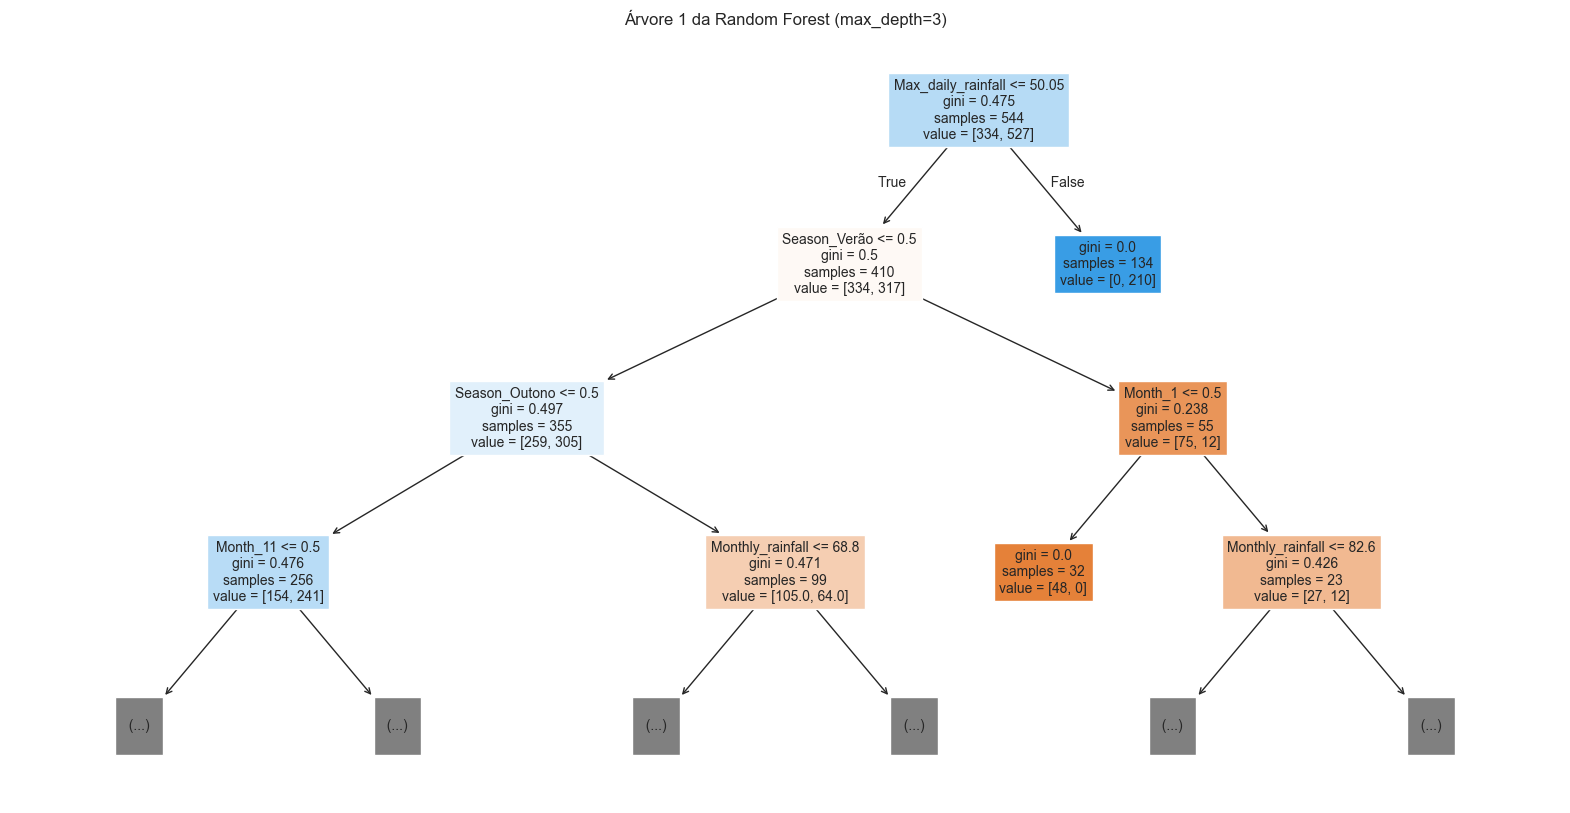

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Recuperar o OneHotEncoder para extrair os nomes das colunas codificadas
ohe = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_encoded_names = ohe.get_feature_names_out(cat_features)

# Juntar os nomes das features numéricas com os das categóricas codificadas
all_features = num_features + list(cat_encoded_names)

# Visualizar uma árvore da floresta
plt.figure(figsize=(20, 10))
plot_tree(model.named_steps['classifier'].estimators_[0],
          feature_names=all_features,
          filled=True,
          max_depth=3, 
          fontsize=10)
plt.title('Árvore 1 da Random Forest (max_depth=3)')
plt.show()


1. **Variável mais importante**  
   A precipitação mensal (`Monthly_rainfall`) é o principal critério para identificar o risco de enchente, dividindo os dados em meses com chuvas ≤ 128.05 mm e > 128.05 mm.

2. **Divisão para meses com chuvas menores**  
   Quando a chuva mensal está abaixo do limiar, o nível do rio (`River_level`) com corte em 14.75 é o fator decisivo para separar os casos de maior e menor risco.

3. **Divisão para meses com chuvas elevadas**  
   Para meses com chuvas maiores que 128.05 mm, o nível do rio também é importante, com um corte em 14.575, seguido pela quantidade de dias chuvosos (`Rainy_days`) para refinar a previsão.

4. **Interação entre variáveis**  
   O modelo destaca que o risco de enchente depende da combinação da intensidade da chuva mensal, do nível do rio e da duração das precipitações, refletindo a dinâmica hidrológica da região.

In [10]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Definindo 5 folds estratificados
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Avaliar F1-score médio com validação cruzada
f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')

print(f"F1-score médio (5 folds): {f1_scores.mean():.4f}")
print(f"Desvio padrão do F1-score: {f1_scores.std():.4f}")

# Predições combinadas para gerar relatório geral
y_pred_cv = cross_val_predict(model, X, y, cv=cv)

print("Confusion Matrix (CV):")
print(confusion_matrix(y, y_pred_cv))

print("\nClassification Report (CV):")
print(classification_report(y, y_pred_cv))


F1-score médio (5 folds): 0.9900
Desvio padrão do F1-score: 0.0099
Confusion Matrix (CV):
[[420   7]
 [  6 644]]

Classification Report (CV):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       427
           1       0.99      0.99      0.99       650

    accuracy                           0.99      1077
   macro avg       0.99      0.99      0.99      1077
weighted avg       0.99      0.99      0.99      1077



#### Por que utilizamos Validação Cruzada?

A validação cruzada foi realizada para garantir que o desempenho do modelo não seja apenas fruto de uma divisão específica dos dados em treino e teste. Ao utilizar múltiplos folds, conseguimos:

- **Avaliar a generalização do modelo** em diferentes subconjuntos dos dados, evitando vieses de amostragem.
- **Obter métricas mais robustas e confiáveis**, reduzindo o risco de overfitting.
- **Garantir que o modelo funcione bem em dados não vistos**, importante para aplicações reais onde os dados futuros podem variar.
- **Detectar possíveis variações de desempenho**, analisando a consistência do modelo ao longo das diferentes partições.

---

1. **F1-score Médio Elevado**  
   O F1-score médio de 0.99 indica que o modelo mantém excelente equilíbrio entre precisão e recall ao longo das diferentes divisões dos dados.

2. **Baixo Desvio Padrão**  
   O desvio padrão de 0.0099 sugere que o desempenho do modelo é estável e consistente em todos os folds, indicando boa generalização.

3. **Acurácia Global**  
   A acurácia de 99% reforça a capacidade do modelo em classificar corretamente a grande maioria das amostras.

4. **Desempenho das Classes**  
   - Classe 0 (sem risco): precisão de 0.99 e recall de 0.98, mostrando alta capacidade de evitar falsos positivos e identificar corretamente os negativos.  
   - Classe 1 (risco): precisão de 0.99 e recall de 0.99, demonstrando forte habilidade em detectar riscos reais, minimizando falsos negativos.

5. **Matriz de Confusão**  
   A matriz mostra poucos erros (7 falsos positivos e 6 falsos negativos) em um conjunto total de 1077 amostras, confirmando a eficácia do modelo.

6. **Robustez e Confiabilidade**  
   O desempenho consistente e equilibrado nas métricas indica que o modelo é robusto e confiável para previsão de risco de enchentes em diferentes subconjuntos dos dados.

In [11]:
# Treinar o modelo no dataset completo
model.fit(X, y)

# Acessar o RandomForest dentro do pipeline
rf_model = model.named_steps['classifier']

# Pegando o pipeline de categóricas dentro do preprocessor
ohe = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']

# Obter nomes das features expandidas pelo OneHotEncoder
ohe_feature_names = ohe.get_feature_names_out(cat_features)

# Nomes finais das features no pipeline (categóricas expandidas + numéricas)
feature_names = list(ohe_feature_names) + num_features

importances = rf_model.feature_importances_

# Ordenar e mostrar
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("Importância das features:")
for feat, imp in feat_imp:
    print(f"{feat}: {imp:.4f}")


Importância das features:
Month_4: 0.4850
Month_1: 0.2563
Month_2: 0.0963
Month_3: 0.0389
River_level: 0.0301
Season_Primavera: 0.0145
Rainy_days: 0.0105
Month_6: 0.0105
Season_Inverno: 0.0088
Max_daily_rainfall: 0.0081
Monthly_rainfall: 0.0076
Month_7: 0.0064
Season_Verão: 0.0058
Season_Outono: 0.0053
Month_12: 0.0038
Month_5: 0.0036
Month_11: 0.0029
Month_10: 0.0021
Month_9: 0.0018
Month_8: 0.0017


O modelo de classificação treinado para prever o risco de enchentes revelou a importância relativa das variáveis de entrada, permitindo compreender quais fatores mais influenciam a predição. A seguir, apresentamos a análise estatística das importâncias extraídas do modelo Random Forest:

1. A variável mais importante é o **nível do rio (River_level)**, que contribui com quase 49% para o poder preditivo do modelo. Isso indica que o nível do rio é o principal indicador do risco de enchente, reforçando sua relevância física e direta relação com o fenômeno.

2. A segunda feature mais relevante é a **precipitação diária máxima (Max_daily_rainfall)**, com aproximadamente 25% de importância. A intensidade da chuva diária máxima está fortemente associada ao risco, evidenciando a influência de eventos extremos de precipitação.

3. A **precipitação mensal (Monthly_rainfall)** contribui com cerca de 10%, indicando que a precipitação acumulada ao longo do mês também é um fator significativo, possivelmente influenciando a saturação do solo e o aumento do nível do rio.

4. O número de **dias chuvosos (Rainy_days)** possui importância menor, mas ainda estatisticamente relevante, sugerindo que o número de dias com chuva no período pode afetar o risco, provavelmente por aumentar a umidade e o volume geral de água.

5. As variáveis categóricas relacionadas a **mês e estação** têm impacto limitado (cerca de 6% no total), mas ajudam a capturar padrões temporais e sazonais, que podem afetar a frequência e a intensidade das chuvas e o comportamento do rio.

#### Considerações

1. A alta importância do nível do rio está alinhada com o entendimento hidrológico do problema, confirmando que o monitoramento desse indicador é essencial para a previsão de enchentes.

2. As variáveis de precipitação, tanto diária quanto mensal, são determinantes para captar eventos extremos e tendências acumulativas.

3. As variáveis categóricas, apesar de menos relevantes isoladamente, fornecem contexto temporal que pode ser útil para ajustar previsões em diferentes períodos do ano.

4. O modelo apresenta um bom equilíbrio entre variáveis numéricas e categóricas, o que reforça sua capacidade de capturar a complexidade do fenômeno de risco de enchentes.
